In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

1. Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot)

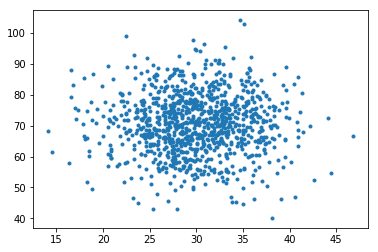

In [43]:
amount = 1000

# зададим нормально распределенную случайную величину
norm_rv1 = sts.norm(loc=30, scale=5)
norm_rv2 = sts.norm(loc=70, scale=10)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
plt.scatter(x, y, marker='.')

2. Нарисовать плотность распределения полученной выборки x

(array([ 2.,  0.,  3.,  4.,  4.,  9.,  3.,  8., 14., 14., 19., 22., 40.,
        41., 43., 58., 75., 67., 67., 61., 52., 58., 66., 58., 31., 39.,
        39., 30., 23., 16.,  9., 10.,  7.,  3.,  2.,  0.,  1.,  1.,  0.,
         1.]),
 array([14.12795605, 14.94363583, 15.75931562, 16.57499541, 17.39067519,
        18.20635498, 19.02203477, 19.83771456, 20.65339434, 21.46907413,
        22.28475392, 23.1004337 , 23.91611349, 24.73179328, 25.54747307,
        26.36315285, 27.17883264, 27.99451243, 28.81019221, 29.625872  ,
        30.44155179, 31.25723158, 32.07291136, 32.88859115, 33.70427094,
        34.51995072, 35.33563051, 36.1513103 , 36.96699009, 37.78266987,
        38.59834966, 39.41402945, 40.22970924, 41.04538902, 41.86106881,
        42.6767486 , 43.49242838, 44.30810817, 45.12378796, 45.93946775,
        46.75514753]),
 <a list of 40 Patch objects>)

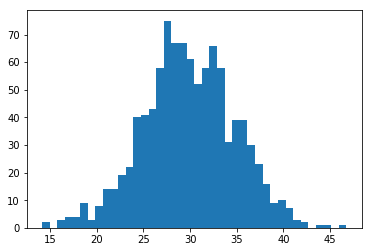

In [44]:
plt.hist(x, bins = 40)

3. Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки.Построить график зависимости (корелляции) x от y.

In [54]:
A = np.vstack((x,y)).T
sx, sy = 0.8, 2.1
Scale = [[sx,0],[0,sy]]
X = A.dot(Scale)

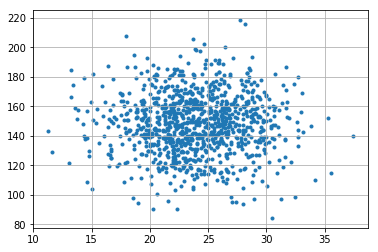

In [55]:
plt.grid()
plt.scatter(X[:,0], X[:,1], marker = '.')

Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x.

In [57]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

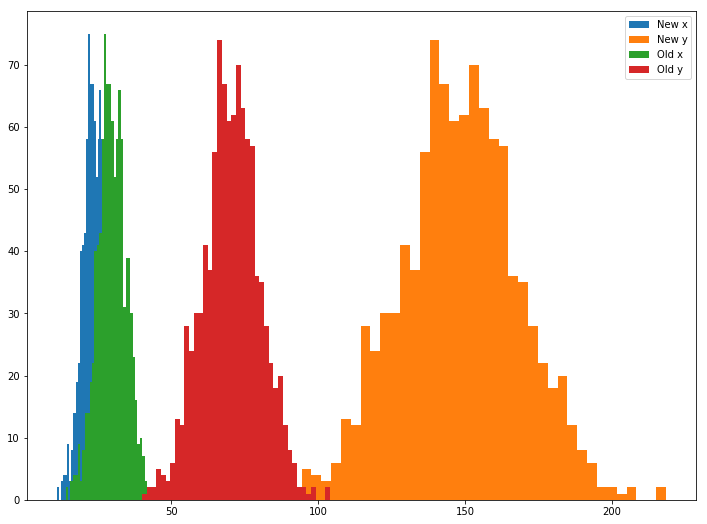

In [60]:
plt.hist(X[:,0], bins = 40)
plt.hist(X[:,1], bins = 40)
plt.hist(A[:,0], bins = 40)
plt.hist(A[:,1], bins = 40)
plt.legend(['New x','New y','Old x','Old y'])

Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?

In [63]:
k,p = sts.stats.pearsonr(X[:,0],X[:,1])

In [64]:
k

0.003084940506656648

Коэффицент близкий к нулю говорит о том, что корреляции между данными нет.

Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

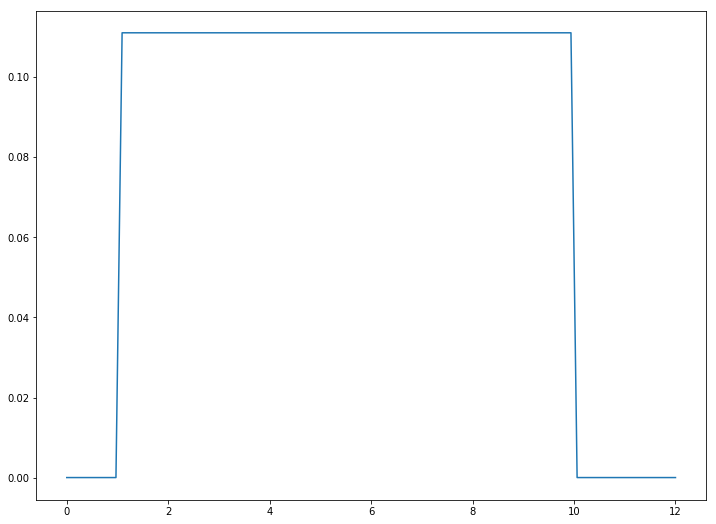

In [65]:
a = 1
b = 10

uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

x = np.linspace(0, 12, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

# Отличается от нормального тем, что в пределах указанного интервала все значения случаной величины равновероятны

Найти на графике примеры выброса. Что они означают?

Не смогла загрузить график. Выбросы - аномальные значения. Чаще всего эти точк далеко отстоят на график от среднего и большинста других точек.


Найти корелляцию в следующих данных:

In [67]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [69]:
# Нормализация значений
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


-0.2083170484878848


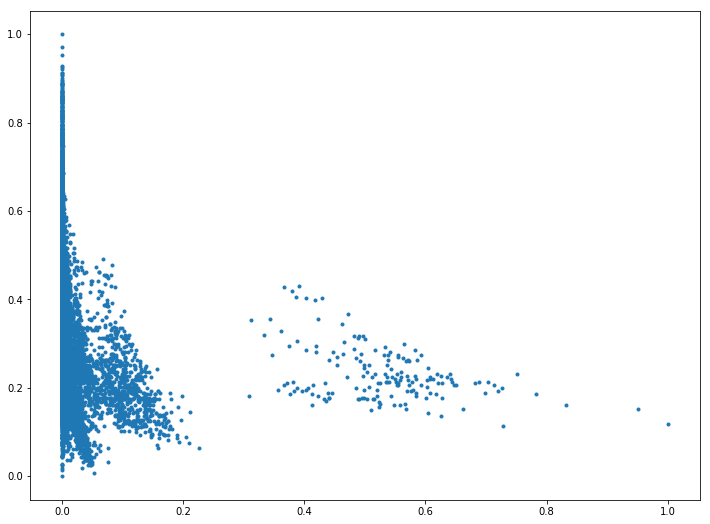

In [74]:
X_4046 = df_norm[0]
Y_AvgPrice = df_norm[1]

corr, p_value = sts.stats.pearsonr(X_4046, Y_AvgPrice)
plt.scatter(X_4046, Y_AvgPrice, marker='.')
print(corr)

Вывод: обратная слабая зависимость. Картину искажает большое число выбросов.